In [3]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

In [4]:
import socket
import torch
print(socket.gethostname())
print(torch.cuda.get_device_name(0))

kevin-PC
GeForce GTX 660M


/home/kevin/.virtualenvs/pytorch/lib/python3.6/site-packages/torch/cuda/__init__.py:117: UserWarning: 
    Found GPU0 GeForce GTX 660M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [5]:
import data.data_transforms
import data.mdff_data
from data.mdff_data import MdffData
from data.mdff_data import MdffH5Data
from data.ddff_data import DDFFData
from tools import project

# dataset_type = DDFFData
# dataset_type = MdffH5Data
# dataset = "MdffH5Data"
dataset = "SuperSlomoData"

transform_data=False

train_data = project.create_component("data", name=dataset, root_dir=proj_dir("datasets"), data_type="train", transform_data=transform_data)
val_data = project.create_component("data", name=dataset, root_dir=proj_dir("datasets"), data_type="val", transform_data=transform_data)
test_data = project.create_component("data", name=dataset, root_dir=proj_dir("datasets"), data_type="test", transform_data=transform_data)

#print(train_data)

Not preloading data.
Not preloading data.
Not preloading data.


Train Data (Count: 5440)


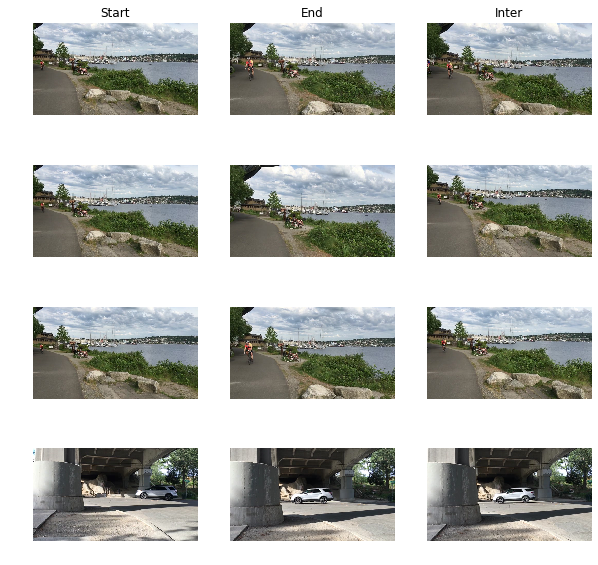

In [6]:
import data.mdff_data
from tools.vis_tools import visualize_tensors
import matplotlib.pyplot as plt
import numpy as np

def visualize_samples(data, figsize=(10, 10)):
    num_samples = 4
    vis_ids = range(0,num_samples)
    #vis_ids = range(5,5+4)
    #vis_ids = np.random.randint(len(data), size=num_samples).tolist()

    plt.figure(figsize=figsize)
    
    imgs = []
    
    for i in vis_ids:
        frames = []
        sample = data[i]
        frames += [*torch.split(sample[0][0], [3, 3])]
        frames += [sample[1]]
        
        #for i in range(len(frames)):
            #frames[i] = (frames[i] + 1) / 2
        
        #for i in range(len(frames)):
            #print(frames[i].min(), frames[i].max())
        
        imgs.append(frames)
        
    
        
    visualize_tensors(imgs, ["Start", "End", "Inter"])
    #visualize_tensors([fs + [fs[0]] for fs in fs_samples], ["Near", "Medium", "Far", "Depth"])
    
#print(val_data.valid_crops[0])
    
print("Train Data (Count: {})".format(len(train_data)))
visualize_samples(train_data)

Val Data (Count: 100)


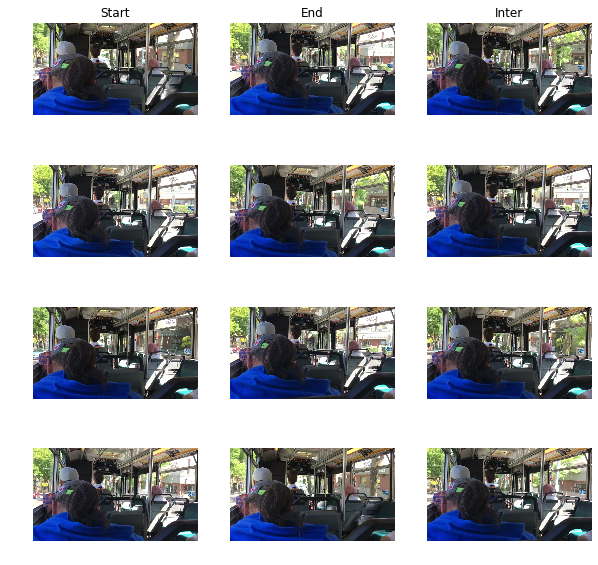

In [7]:
print("Val Data (Count: {})".format(len(val_data)))
visualize_samples(val_data)

Test Data (Count: 265)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

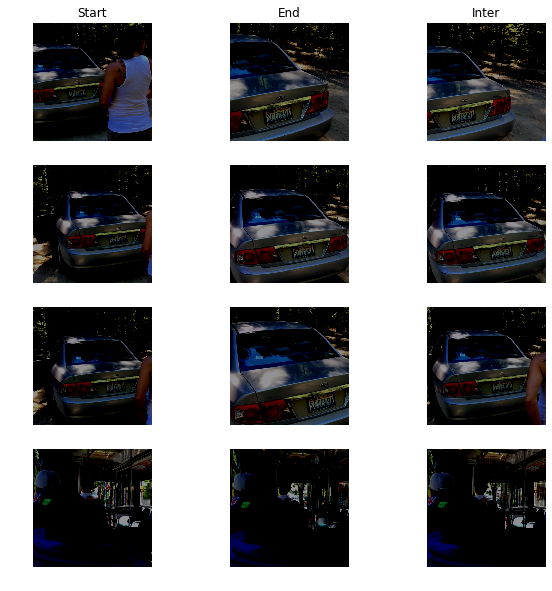

In [6]:
print("Test Data (Count: {})".format(len(test_data)))
visualize_samples(test_data)

In [7]:
import trainer.batch_train
import torch
import numpy as np
#from common.batch_train import grid_train_dataset+
from trainer import BatchTrain
from net.ddff_net import DDFFNetDummy
import os

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

params = {
    "train": {
        "name": "SuperSlomoTrainer",
        "batch_size": 2,
        #"batch_size": 1,
        "num_epochs": 5,
        "optimizer": {
            "name": "Adam",
            "lr": 1e-4,
            "weight_decay": 0.0
        },
        "load_checkpoint": {
            #"model": "test_model",
            "epoch": 4
        },
        #"max_gradient": 1
    },
    "dataset": {
        #"name": "MdffH5DataDbgSmall"
        "name": "SuperSlomoDataDbgSmall"
    },
    "net": {
        "name": "SuperSlomoNetDummy",
        #"dropout": 0.5
        "w": 352,
        "h": 352,
        "device": "cuda:0"
    },
    "logging": {
        "log_it_freq": 0,
        "log_val_freq": 5,
        "losses": ["l1", "l2"]
    },
    "save": {
        "name": "test_model",
        "mode": "all",
        "checkpoint_freq": 2
    }
}

params = BatchTrain.set_param_paths(
    params, 
    dataset_path=proj_dir("datasets"), 
    model_path=proj_dir("models", "ddff_mdff"))

batch_train = BatchTrain()

best_pass = batch_train.train(params)

START GRID TRAIN (Mon Jan 14 15:14:25 2019)
PARAM SETTING
{
    "train": {
        "name": "SuperSlomoTrainer",
        "batch_size": 2,
        "num_epochs": 5,
        "optimizer": {
            "name": "Adam",
            "lr": 0.0001,
            "weight_decay": 0.0
        },
        "load_checkpoint": {
            "epoch": 4
        }
    },
    "save": {
        "mode": "all",
        "checkpoint_freq": 2,
        "name": "test_model"
    },
    "net": {
        "name": "SuperSlomoNetDummy",
        "w": 352,
        "h": 352,
        "device": "cuda:0"
    },
    "dataset": {
        "name": "SuperSlomoDataDbgSmall"
    },
    "logging": {
        "log_it_freq": 0,
        "log_val_freq": 5,
        "losses": [
            "l1",
            "l2"
        ]
    },
    "paths": {
        "model": "../../../models/ddff_mdff",
        "data": "../../../datasets"
    }
}
TRAIN ON cuda:0
GeForce GTX 660M 2GB
Not preloading data.
Not preloading data.
Train model
SuperSlomoNetDummy
Par